<a href="https://colab.research.google.com/github/muri-boy/UTS-Data-Mining/blob/main/UTS_Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


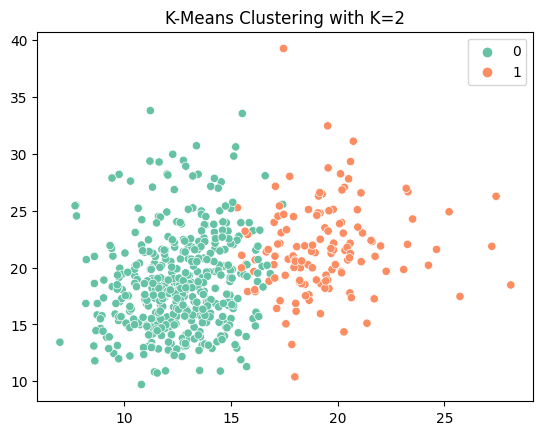

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


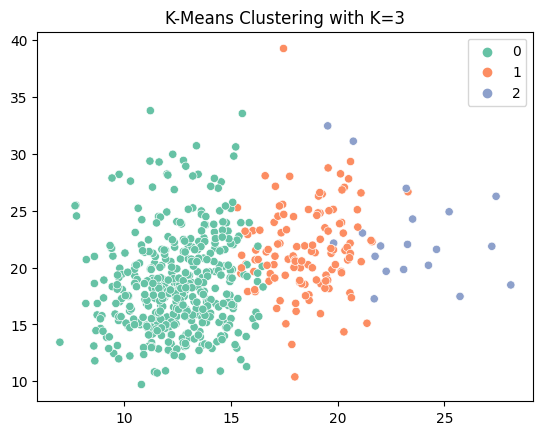

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


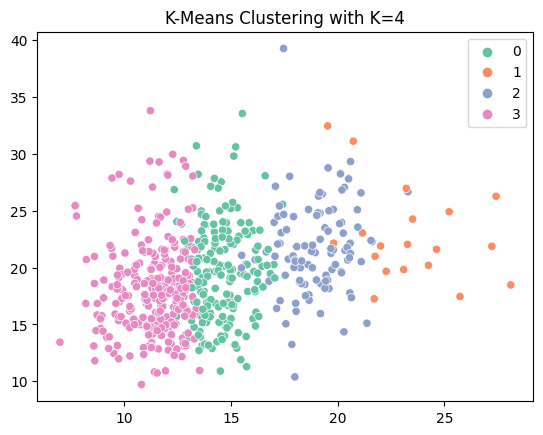

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


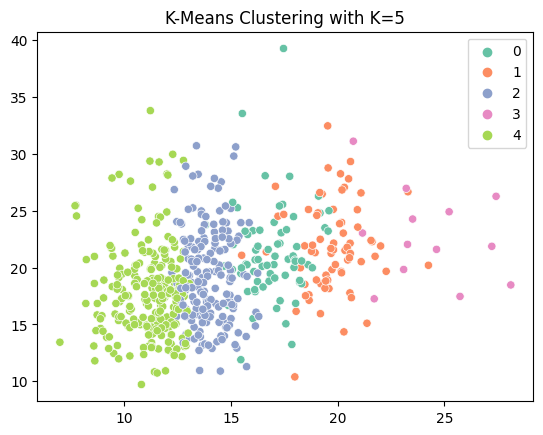

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


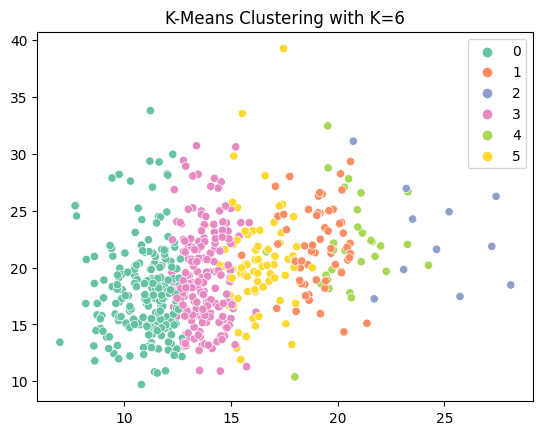

In [9]:
# Import necessary libraries
from sklearn.cluster import KMeans
import seaborn as sns

# Load the breast cancer dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

# Apply K-Means clustering with a range of K values
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    
    # Visualize the clustering results
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=kmeans.labels_, palette=sns.color_palette("Set2", k))
    plt.title(f'K-Means Clustering with K={k}')
    plt.show()

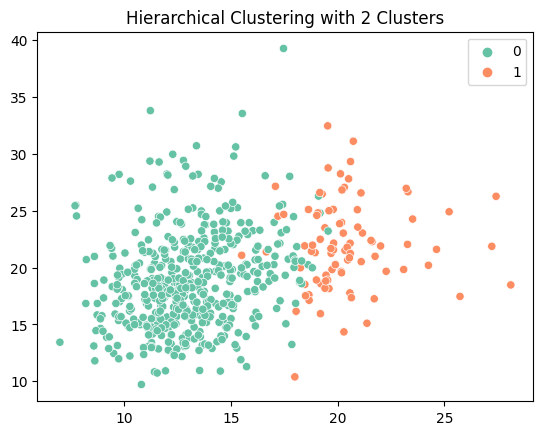

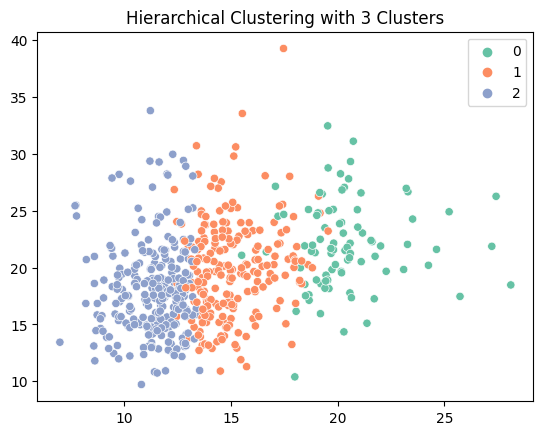

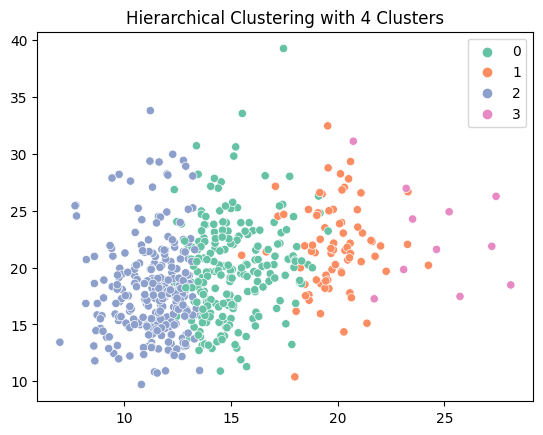

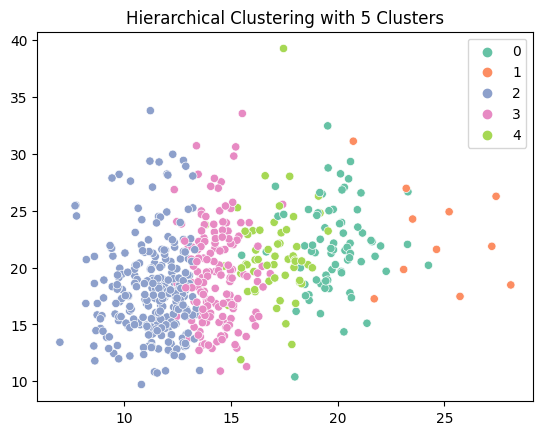

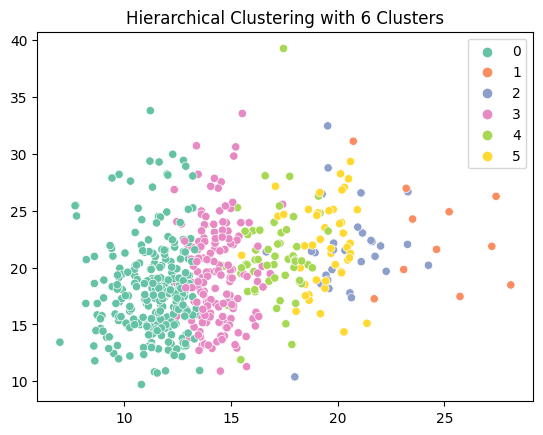

In [10]:
# Import necessary libraries
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

# Load the breast cancer dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

# Apply Hierarchical clustering with a range of hyperparameter values
for n_clusters in range(2, 7):
    hc = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    hc.fit(X)
    
    # Visualize the clustering results
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=hc.labels_, palette=sns.color_palette("Set2", n_clusters))
    plt.title(f'Hierarchical Clustering with {n_clusters} Clusters')
    plt.show()

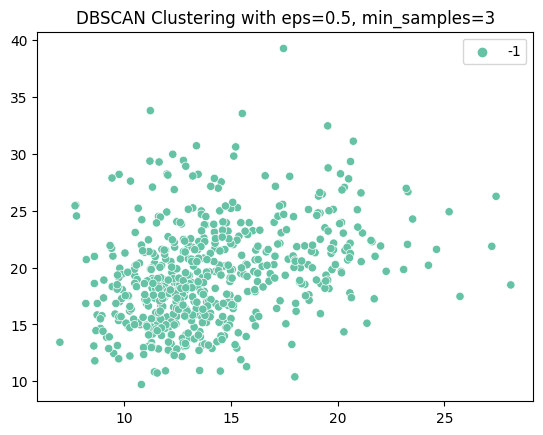

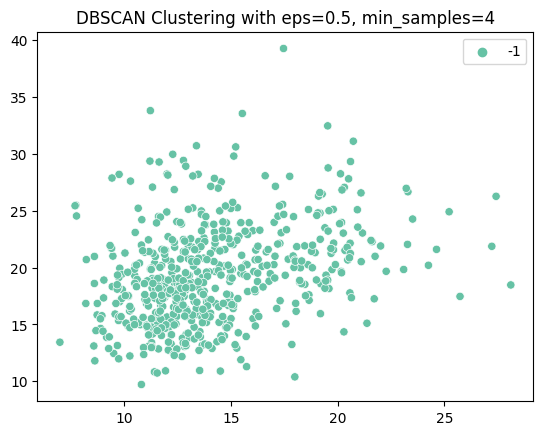

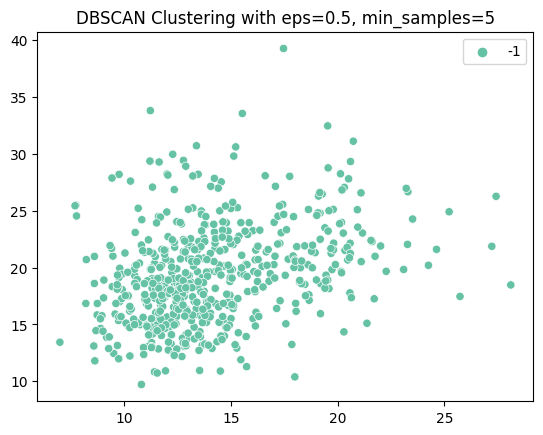

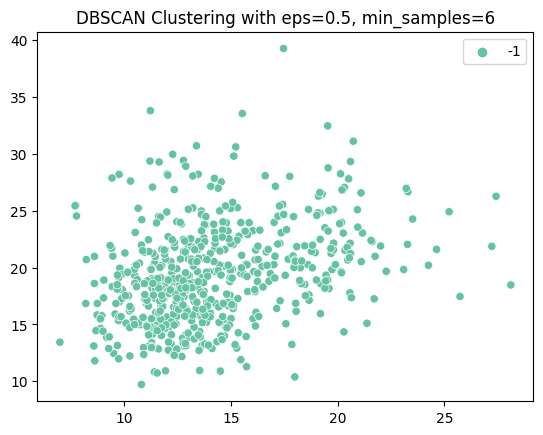

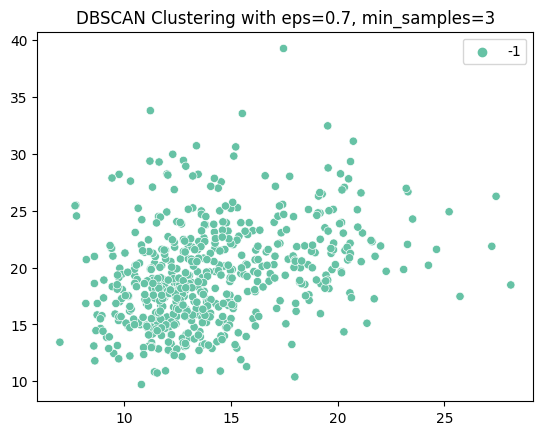

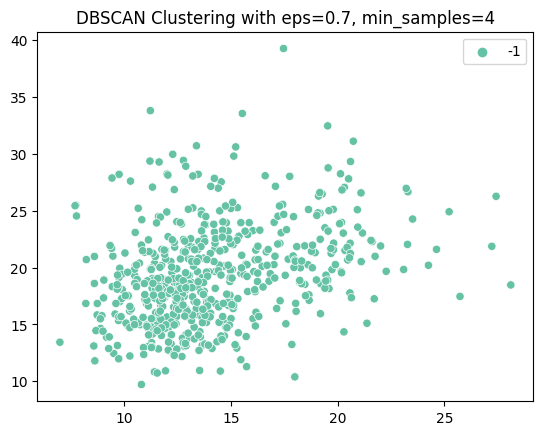

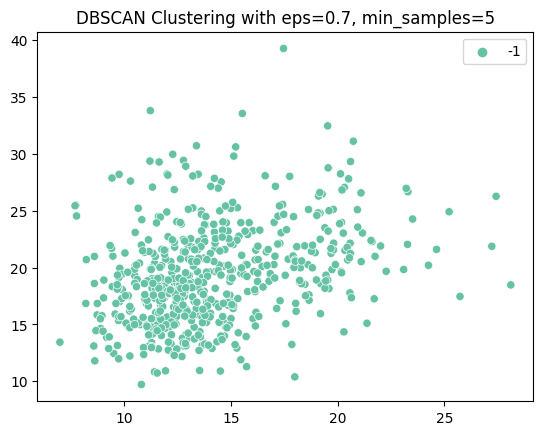

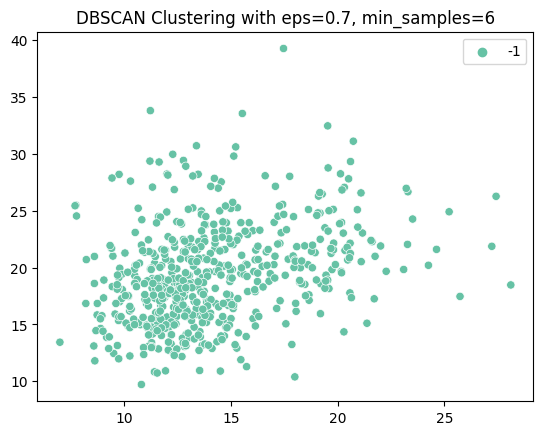

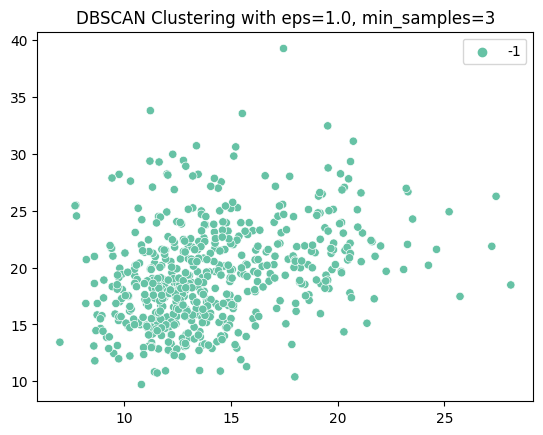

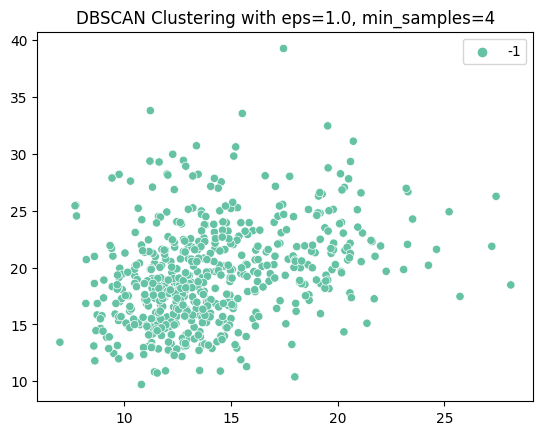

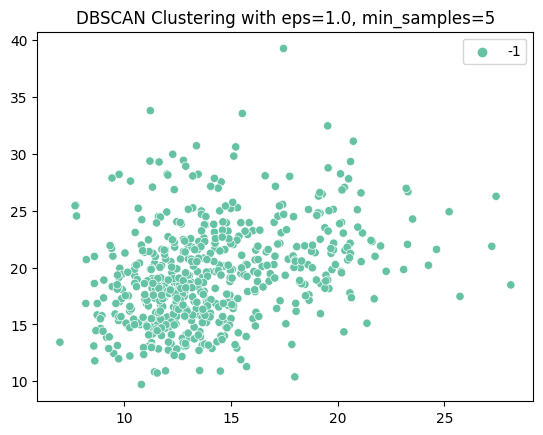

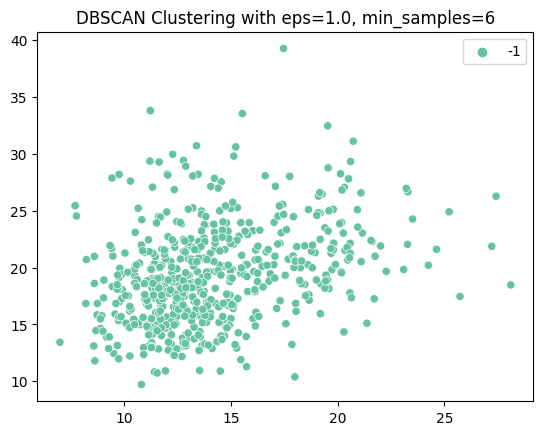

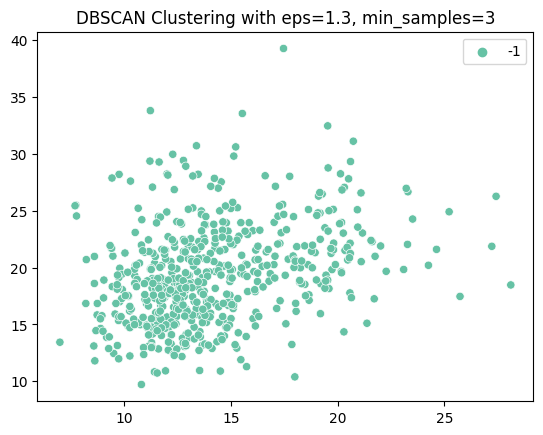

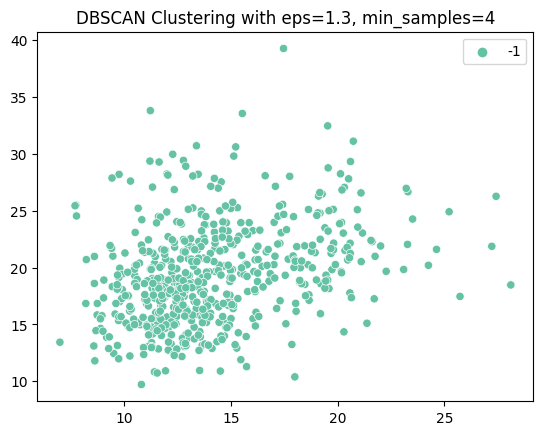

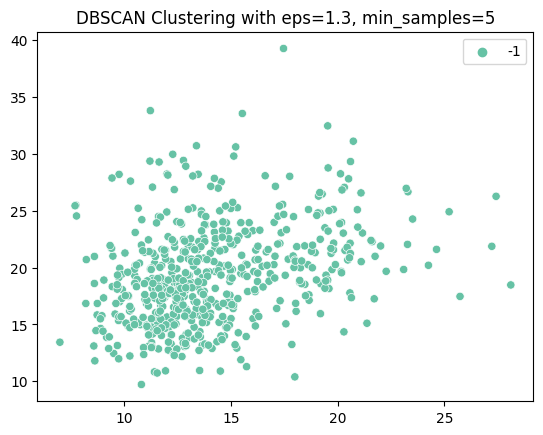

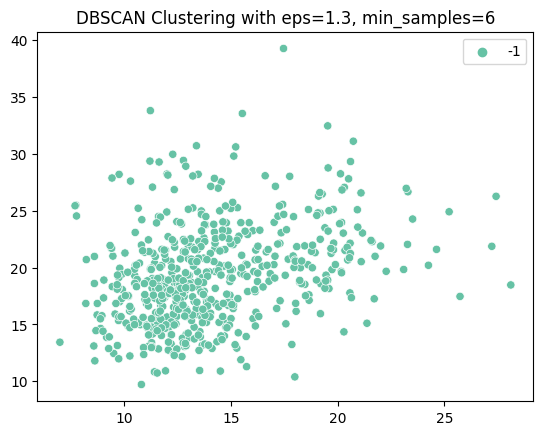

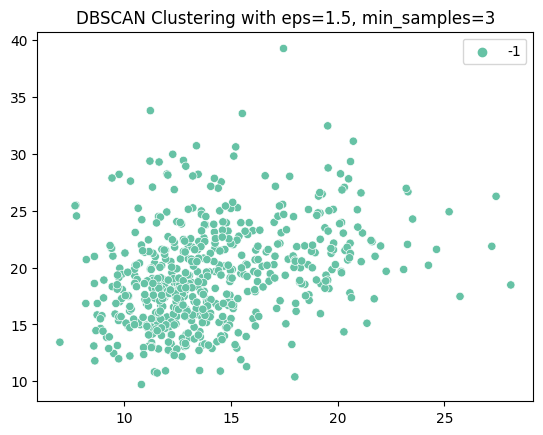

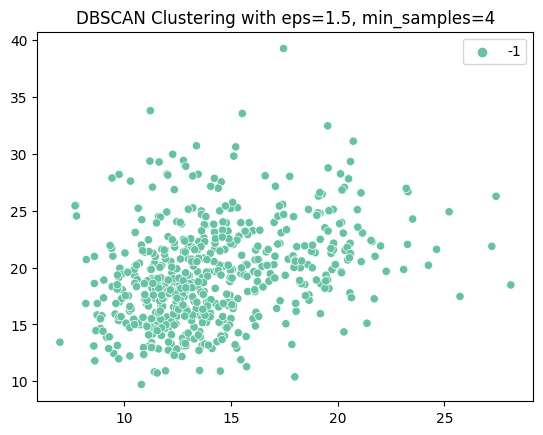

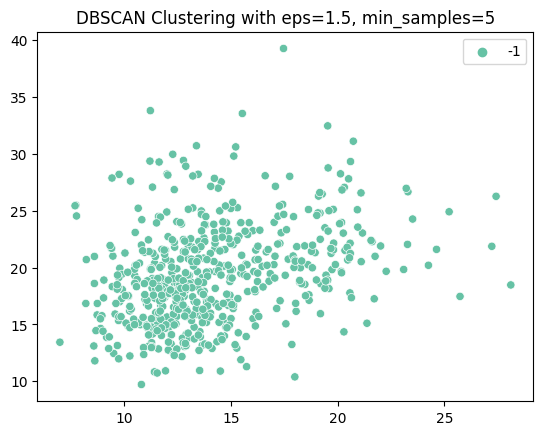

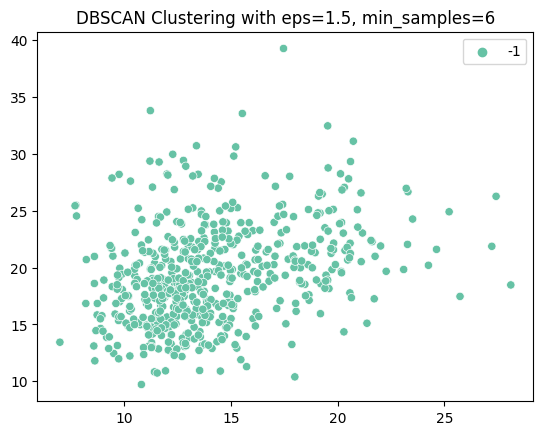

In [11]:
# Import necessary libraries
from sklearn.cluster import DBSCAN
import seaborn as sns

# Load the breast cancer dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

# Apply DBSCAN clustering with a range of hyperparameter values
for eps in [0.5, 0.7, 1.0, 1.3, 1.5]:
    for min_samples in range(3, 7):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(X)
        
        # Visualize the clustering results
        sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=dbscan.labels_, palette=sns.color_palette("Set2", len(set(dbscan.labels_))))
        plt.title(f'DBSCAN Clustering with eps={eps}, min_samples={min_samples}')
        plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Silhouette score for k-means clustering with 2 clusters: 0.3449740051034408
Silhouette score for hierarchical clustering: 0.33938477753669855
Silhouette score for DBSCAN clustering: -0.3381983588045696


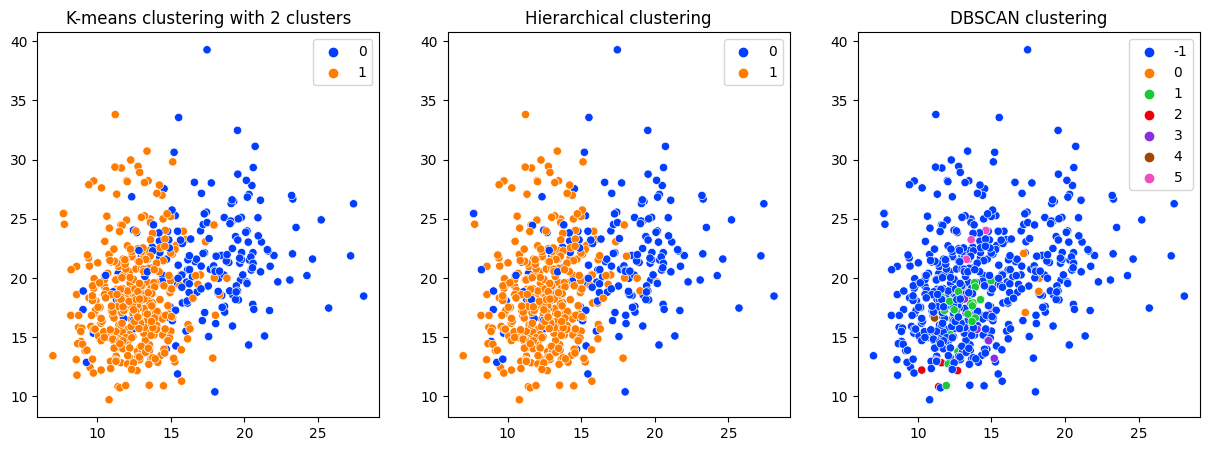

In [16]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Preprocessing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform k-means clustering
k_values = range(2, 7)
k_scores = []
k_clusters = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    k_scores.append(silhouette_score(X_scaled, kmeans.labels_))
    k_clusters.append(kmeans.labels_)

best_k = np.argmax(k_scores)
best_kmeans_clusters = k_clusters[best_k]

# Perform hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=2)
hierarchical.fit(X_scaled)
hierarchical_score = silhouette_score(X_scaled, hierarchical.labels_)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=1.5, min_samples=3)
dbscan.fit(X_scaled)
dbscan_score = silhouette_score(X_scaled, dbscan.labels_)

# Evaluate the results
print(f"Silhouette score for k-means clustering with {best_k+2} clusters: {k_scores[best_k]}")
print(f"Silhouette score for hierarchical clustering: {hierarchical_score}")
print(f"Silhouette score for DBSCAN clustering: {dbscan_score}")

# Plot the results
fig, axes = plt.subplots(1, 3, figsize=(15,5))

# K-means plot
sns.scatterplot(ax=axes[0], x=X[:,0], y=X[:,1], hue=best_kmeans_clusters, palette='bright')
axes[0].set_title(f"K-means clustering with {best_k+2} clusters")

# Hierarchical plot
sns.scatterplot(ax=axes[1], x=X[:,0], y=X[:,1], hue=hierarchical.labels_, palette='bright')
axes[1].set_title("Hierarchical clustering")

# DBSCAN plot
sns.scatterplot(ax=axes[2], x=X[:,0], y=X[:,1], hue=dbscan.labels_, palette='bright')
axes[2].set_title("DBSCAN clustering")

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

ValueError: ignored

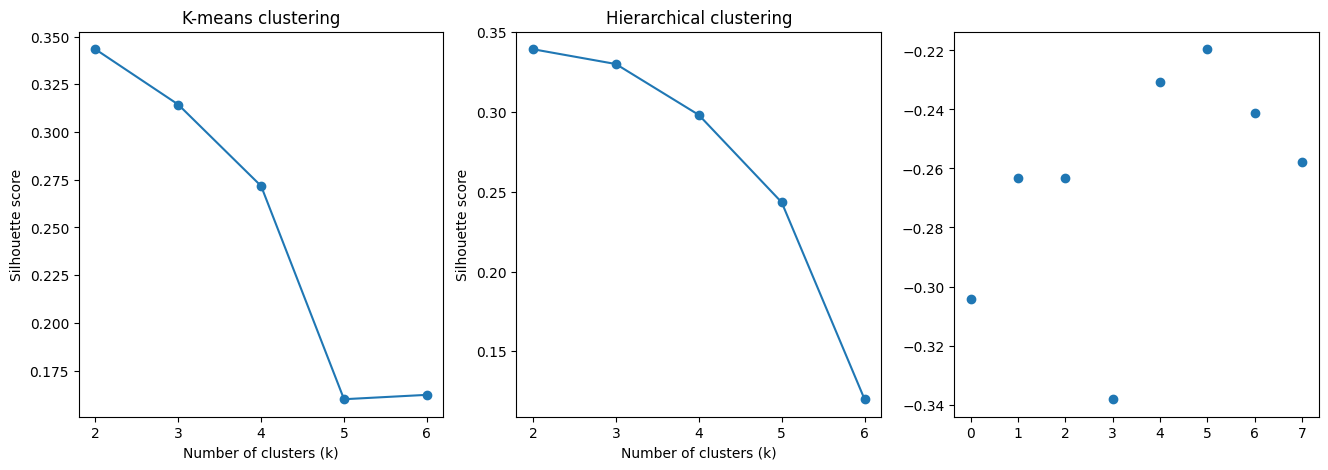

In [18]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Preprocessing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-means clustering
kmeans_scores = []
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    kmeans_scores.append(score)

# Hierarchical clustering
hc_scores = []
for k in range(2, 7):
    hc = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    hc.fit(X_scaled)
    score = silhouette_score(X_scaled, hc.labels_)
    hc_scores.append(score)

# DBSCAN clustering
dbscan_scores = []
eps_values = [0.5, 0.7, 1.0, 1.3, 1.5]
min_samples_values = range(3, 8)
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(X_scaled)
        if len(set(dbscan.labels_)) > 1:
            score = silhouette_score(X_scaled, dbscan.labels_)
            dbscan_scores.append(score)

# Plot results
fig, ax = plt.subplots(1, 3, figsize=(16,5))
ax[0].plot(range(2,7), kmeans_scores, marker='o')
ax[0].set_xlabel('Number of clusters (k)')
ax[0].set_ylabel('Silhouette score')
ax[0].set_title('K-means clustering')

ax[1].plot(range(2,7), hc_scores, marker='o')
ax[1].set_xlabel('Number of clusters (k)')
ax[1].set_ylabel('Silhouette score')
ax[1].set_title('Hierarchical clustering')

ax[2].scatter(range(len(dbscan_scores)), dbscan_scores)
ax[2].set_xticks(range(len(dbscan_scores)))
ax[2].set_xticklabels([f"eps={eps}, min_samples={min_samples}" for eps in eps_values for min_samples in min_samples_values])
ax[2].set_xlabel('DBSCAN parameters')
ax[2].set_ylabel('Silhouette score')
ax[2].set_title('DBSCAN clustering')
plt.show()
